## Starter Code

This code file contains a simple starter notebook for the HelpMate AI project.
The project has two options:
- Build and improve HelpMate RAG system
- BYOP (Bring Your Own Project)

Feel free to modify the notebook as per your requirements, based on the choice of your project.


### Part 1

***Problem Statement*** - The goal of the project is to build a RAG system using frameworks such as LlamaIndex or LangChain.


### RAG - System Architecture

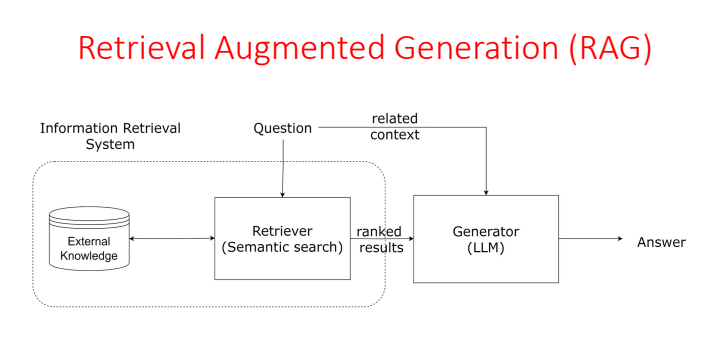

### Part 2 - Solution POC

The basic RAG pipeline in LlamaIndex is illustrated below.

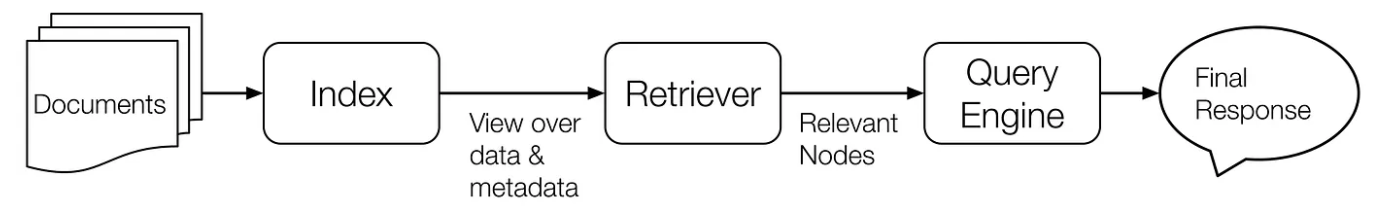

This starter notebook contains the general steps to create an RAG using LlamaIndex framework. Feel free to modify the code as per your requirement.

**Step 1** : Import the necessary libraries

In [1]:
# Install OpenAI, LlamaIndex
!pip install -U -qq llama-index openai

In [2]:
## Install additional supporting libraries as required

In [3]:
# Importing the libraries
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai
import pandas as pd

**Step 2**: Mount your Google Drive and Set the API key

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [5]:
# Set the API key
filepath = "/content/drive/MyDrive/HelpMate Project/Policy documents"
with open("/content/drive/MyDrive/HelpMate Project/OpenAI_API_Key.txt",encoding='utf-8-sig') as f:
  openai.api_key = ' '.join(f.readlines())

In [6]:
if openai.api_key.startswith('sk-'):
    print('API key loaded successfully')
else:
  print('Improper API key format')

API key loaded successfully


Step 3 - Data Loading

Dataset:

- For HelpMate AI project, the insurance documents can be downloaded from the module 'RAG Demonstration' or download the files from the following [link](https://cdn.upgrad.com/uploads/production/8e278245-506c-4c8c-9246-892280692919/Policy+Documents.zip)

- For BYOP project, you may create your own dataset or open-source datasets from [Kaggle](www.kaggle.com)

Use the appropriate document loader for loading the documents.

**NOTE** - No matter how powerful the given data loader is, ensure that your file is properly formatted, and the loader is able to read the file clearly else the query engine might fail.

In [7]:
# Import the necessary loader
# Instantiate the reader with the input directory to the files
# Create document objects and load the data

from llama_index.core import SimpleDirectoryReader

# Let us take input from a directory
reader = SimpleDirectoryReader(input_dir="//content/drive/MyDrive/HelpMate Project/Policy documents")
# Use the load_data() method to read the files from the directory
documents = reader.load_data()
# number of files
print(f"Loaded {len(documents)} docs")
# number of PDF Files
input_dir = "//content/drive/MyDrive/HelpMate Project/Policy documents"
pdf_files = [f for f in os.listdir(input_dir) if f.endswith('.pdf')]

print(f"Found {len(pdf_files)} PDF files")

Loaded 217 docs
Found 7 PDF files


Step 4 - Building the query engine

The general process for creating the query_engine is:
- Load the documents
- Create nodes from the documents
- Create index from documents
- Initialise the Query Engine
- Query the index with the prompt
- Generate the response using the retrieved nodes

In [8]:
# Import the necessary libraries
# Create parser and parse document into nodes
# Build index
# Construct Query Engine
# Perform query operation and generate the response

from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core import VectorStoreIndex
from IPython.display import display, HTML

# create parser and parse document into nodes
parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)

# # build index
index = VectorStoreIndex(nodes)

# Construct Query Engine
query_engine = index.as_query_engine()


In [9]:
type(index)

llama_index.core.indices.vector_store.base.VectorStoreIndex

In [10]:
query = 'Summarize the smart pension plan policy.'

response = query_engine.query(query)

response.response

'The smart pension plan policy outlines various key aspects such as the option to purchase annuity, flexibility in altering the premium payment term, the ability to redirect premiums among segregated funds, criteria for payment of benefits, mode of benefit payment, tax liabilities and deductions, notice issuance by the company, the entire contract details, risk factors associated with the policy, and the governing law and jurisdiction.'

In [11]:
response = query_engine.query("Benifit amount of HDFC Surgicare Plan?")
type(response)
response.response

'The benefit amount of the HDFC SurgiCare Plan is Rs 2,00,000 for both Surgical Benefit and Hospitalisation Cash Benefit.'

In [12]:
# WEcan also see the metadeta of the response
response.metadata

{'f082b431-b3f2-4f53-bff2-c150dfa1f20d': {'page_label': '7',
  'file_name': 'HDFC-Surgicare-Plan-101N043V01.pdf',
  'file_path': '//content/drive/MyDrive/HelpMate Project/Policy documents/HDFC-Surgicare-Plan-101N043V01.pdf',
  'file_type': 'application/pdf',
  'file_size': 249055,
  'creation_date': '2025-02-25',
  'last_modified_date': '2025-02-20'},
 '088f4c43-38a0-4f47-bf8d-073bbaa15941': {'page_label': '3',
  'file_name': 'HDFC-Surgicare-Plan-101N043V01.pdf',
  'file_path': '//content/drive/MyDrive/HelpMate Project/Policy documents/HDFC-Surgicare-Plan-101N043V01.pdf',
  'file_type': 'application/pdf',
  'file_size': 249055,
  'creation_date': '2025-02-25',
  'last_modified_date': '2025-02-20'}}

In [13]:
# These are the nodes used as source
response.source_nodes

[NodeWithScore(node=TextNode(id_='f082b431-b3f2-4f53-bff2-c150dfa1f20d', embedding=None, metadata={'page_label': '7', 'file_name': 'HDFC-Surgicare-Plan-101N043V01.pdf', 'file_path': '//content/drive/MyDrive/HelpMate Project/Policy documents/HDFC-Surgicare-Plan-101N043V01.pdf', 'file_type': 'application/pdf', 'file_size': 249055, 'creation_date': '2025-02-25', 'last_modified_date': '2025-02-20'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='e57323ea-9df6-489d-b1d3-23476a98a8f0', node_type='4', metadata={'page_label': '7', 'file_name': 'HDFC-Surgicare-Plan-101N043V01.pdf', 'file_path': '//content/drive/MyDrive/HelpMate Project/Policy documents/HDFC-Surgicare-Plan-101N043V01.pdf', 'file_type': 'application/

In [14]:
print('Page No.' + response.source_nodes[0].node.metadata['page_label'] + ' of ' + response.source_nodes[0].node.metadata['file_name'])

Page No.7 of HDFC-Surgicare-Plan-101N043V01.pdf


In [15]:
# Similarity Score
print('Similarity score = ' + str(round(response.source_nodes[0].score,2)))


Similarity score = 0.9


Step 5 - Creating a Response Pipeline

A Query Response pipeline encapsulates all the necssary steps to build a RAG pipeline. Modify the functions `query_response` and `initialize_conv()`  below. The `query_response` functions return the query response from the query engine along with the supporting documents and the `initialize_conv()` function creates an interactive chatbot.

In [16]:
## Query response function
def query_response(user_input):
  response = query_engine.query(user_input)
  file_name = file_name = response.source_nodes[0].node.metadata['file_name'] + " page nos: " + response.source_nodes[0].node.metadata['page_label'] + ", " + response.source_nodes[1].node.metadata['page_label']
  final_response = response.response + "\n You can find more details at " + file_name

  return final_response

  return final_response

In [17]:
def initialize_conv():
  print("Hi I'm your HelpMate! Feel free to ask me any questions regarding HDFC insurance policies. You can type 'exit' the chat once your doubts are resolved.")
  while True:
    user_input = input()
    if user_input.lower() == 'exit':
      print('Exiting the program... Have a nice day!')
      break
    else:
      response = query_response(user_input)
      display(HTML(f'<p style="font-size:20px">{response}</p>'))



In [18]:
initialize_conv()

Hi I'm your HelpMate! Feel free to ask me any questions regarding HDFC insurance policies. You can type 'exit' the chat once your doubts are resolved.
What is the surender value in HDFC Group term plan


Exit
Exiting the program... Have a nice day!



**Step 7** - Build a Testing Pipeline

Here we feed a series of questions to the Q/A bot and store the responses along with the feedback on whether it's accurate or not from the user

Create atleast 5 questions and store them in the `questions` list to be queried by the RAG system using the `testing_pipeline` function.

In [19]:
questions = ["What is the HDFC Life Group term life policy?",
             "What are the plan options for the Poorna Suraksha policy?",
             "What type of surgeries are covered under the HDFC Surgicare plan?",
             "What is SSV in HDFC Life Sanchay?",
             "What is the surender value in HDFC Group term plan'?",
             ]

In [20]:
def testing_pipeline(questions):


  test_feedback  = []
  for i in questions:
    print(i)
    print(query_response(i))
    print('\n Please provide your feedback on the response provided by the bot')
    user_input = input()
    page = query_response(i).split()[-1]
    test_feedback.append((i,query_response(i),page,user_input))

  feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Page','Good or Bad'])
  return feedback_df






In [21]:
testing_pipeline(questions)

What is the HDFC Life Group term life policy?
The HDFC Life Group Term Life policy is a non-linked, non-participating Group Life Insurance Policy offered by HDFC Life Insurance Company Limited. It provides coverage for groups such as employer-employee groups and non-employer-employee groups, with specific provisions like exclusions related to suicide and optional accidental death benefits. The policy is governed by the laws of India and outlines the terms and conditions that define the entire contract between the policyholder and the insurance company.
 You can find more details at HDFC-Life-Group-Term-Life-Policy.pdf page nos: 20, 4

 Please provide your feedback on the response provided by the bot
Good
What are the plan options for the Poorna Suraksha policy?
The plan options for the Poorna Suraksha policy include the Additional Sum Assured option and the Settlement Option.
 You can find more details at HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf page nos: 7, 10

 P

Question  \
0      What is the HDFC Life Group term life policy?   
1  What are the plan options for the Poorna Surak...   
2  What type of surgeries are covered under the H...   
3                  What is SSV in HDFC Life Sanchay?   
4  What is the surender value in HDFC Group term ...   

                                            Response Page Good or Bad  
0  The HDFC Life Group Term Life policy is a non-...    4        Good  
1  The plan options for the Poorna Suraksha polic...   10        Good  
2  Cornea transplantation due to Trauma (for each...    2        Good  
3  SSV in HDFC Life Sanchay is a surrender value ...   17        Good  
4  The surrender value in HDFC Group term plan re...    9        Good

### Part 3 - Additional Steps


3.1 - Building a custom prompt template

You can try building a custom prompt template for improving the generation capabilities of the RAG system.

In [29]:
# Custom prompt template for improved query response
response = query_engine.query("Summarize the Policy Documents")

In [30]:
response.response

'The policy documents for HDFC Life Sampoorna Jeevan provide detailed information about the terms and conditions of the policy, coverage benefits, premium payment details, policyholder rights and obligations, as well as the procedures for making a claim or surrendering the policy.'

In [31]:
response.source_nodes[0]

NodeWithScore(node=TextNode(id_='c84174aa-5dc0-4b66-9563-ff6f5c9e93ba', embedding=None, metadata={'page_label': '44', 'file_name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_path': '//content/drive/MyDrive/HelpMate Project/Policy documents/HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_type': 'application/pdf', 'file_size': 1990500, 'creation_date': '2025-02-25', 'last_modified_date': '2025-02-20'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='a840b703-dd9b-45e0-9427-3a1c09374dd8', node_type='4', metadata={'page_label': '44', 'file_name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_path': '//content/drive/MyDrive/HelpMate Proje

In [32]:
response.source_nodes[1].node.text

''

In [33]:
retrieved = response.source_nodes[0].node.text + response.source_nodes[1].node.text

In [34]:
messages = [
    {"role":"system", "content":"You are an AI assistant to user."},
    {"role":"user", "content":f"""Summarize the documents. Check in '{retrieved}' """},
          ]

In [35]:
response2 = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages)
response2.choices[0].message.content

"I'm happy to help summarize your documents. Please go ahead and upload the documents so I can review them and provide you with a summary."

3.2 - Recommendations on how to further improve RAG pipeline:

- Based on the testing pipeline's feedback, you can further develop a strategy on how to improve the RAG pipeline further
- This can be through building a better/cleaner dataset, or utilizing better data pre-processing techniques
- If the accuracy is good enough, think of implementing some more use cases and user stories. Maybe a set of users want to do XYZ, and that requirement needs to be implemented in the solution. Think of a proper tool that can enable you to do that.

Additional suggestions for improving the RAG pipeline are listed below:

**Suggestion 1** - Using Customized Nodes and LLMs

This can be used if your responses are not accurate or is not being summarized very well



In [36]:
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import VectorStoreIndex as VSI, SimpleDirectoryReader, Settings, PromptTemplate
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings

##Initialize the OpenAI model
Settings.llm = OpenAI(model="gpt-3.5-turbo", temperature=0, max_tokens=256)

##Initialize the embedding model
Settings.embed_model = OpenAIEmbedding()

## Initialize the node_parser with the custom node settings
Settings.node_parser = SentenceSplitter(chunk_size=512, chunk_overlap=20)

## Initialize the num_output and the context window
Settings.num_output = 512
Settings.context_window = 3900

# Create a VectorStoreIndex from a list of documents using the service context
index = VectorStoreIndex.from_documents(documents)

# Initialize a query engine for the index with a specified similarity top-k value
query_engine = index.as_query_engine(similarity_top_k=3)

In [40]:
#Query the engine with a specific question
response = query_engine.query("Based on the documents provided, can you generate 3 questions to test my RAG application?")


In [41]:
response.response

'What is the specific time frame mentioned in the policy documents after which a life insurance policy cannot be called into question on any ground whatsoever?\n\nWhat are the conditions under which a life insurance policy may be called into question within 3 years from specific dates?\n\nIn case of misstatement or fraud leading to the repudiation of a life insurance policy, what actions should the insurer take and what are the responsibilities of the insured or claimant?'

In [42]:
#Query the engine with a specific question Number 1
response = query_engine.query("What is the specific time frame mentioned in the policy documents after which a life insurance policy cannot be called into question on any ground whatsoever?")

In [43]:
response.response

'After the expiry of 3 years from the date of issuance of the policy, commencement of risk, revival of policy, or the date of rider to the policy (whichever is later), a life insurance policy cannot be called into question on any ground whatsoever.'

In [44]:
#Query the engine with a specific question Number 2
response = query_engine.query("What are the conditions under which a life insurance policy may be called into question within 3 years from specific dates?")

In [45]:
response.response

'A life insurance policy may be called into question within 3 years from specific dates if there are grounds of fraud. The dates from which the 3-year period is calculated include the date of issuance of the policy, the date of commencement of risk, the date of revival of the policy, or the date of rider to the policy, whichever is later. The insurer must communicate in writing to the insured or relevant parties, specifying the grounds and materials on which the decision is based.'

In [46]:
#Query the engine with a specific question Number 2
response = query_engine.query("In case of misstatement or fraud leading to the repudiation of a life insurance policy, what actions should the insurer take and what are the responsibilities of the insured or claimant?")

In [47]:
response.response

"The insurer should communicate in writing to the insured or legal representative or nominee or assignees of insured, mentioning the ground and materials on which the decision to repudiate the policy is based. If the misstatement was true to the best of the insured's knowledge and there was no deliberate intention to suppress the fact, the insured or claimant should prove this. The onus of disproving is upon the Policyholder, if alive, or claimant."

**Suggestion 2** - [Sub Question Query Engine](https://docs.llamaindex.ai/en/stable/examples/query_engine/sub_question_query_engine/)

**Suggetion 3**: [Build RAG using Agentic Systems](https://docs.llamaindex.ai/en/stable/examples/query_engine/knowledge_graph_rag_query_engine/)

**Suggestion 4**: [Retriever Router Query Engine](https://docs.llamaindex.ai/en/stable/examples/query_engine/RetrieverRouterQueryEngine/)

**Suggestion 5**: [FLARE](https://docs.llamaindex.ai/en/stable/examples/query_engine/flare_query_engine/)

**Suggestion 6**: [HyDE](https://docs.llamaindex.ai/en/stable/examples/query_transformations/HyDEQueryTransformDemo/)


**Suggestion 7**: Use different loaders for parsing documents such as [Unstructured Reader](https://docs.llamaindex.ai/en/stable/api_reference/readers/file/?h=unstructured#llama_index.readers.file.UnstructuredReader) or [PyMuPDFReader](https://docs.llamaindex.ai/en/stable/api_reference/readers/file/?h=unstructured#llama_index.readers.file.PyMuPDFReader)

You can refer to the following links for additional information on improving the RAG pipeline:
- https://docs.llamaindex.ai/en/stable/optimizing/basic_strategies/basic_strategies.html
- https://docs.llamaindex.ai/en/stable/optimizing/production_rag/
- https://docs.llamaindex.ai/en/stable/optimizing/agentic_strategies/agentic_strategies/